In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
name=[]
link=[]
for i in range(1,6):
    page = requests.get("https://www.imdb.com/title/tt0903747/episodes?season="+str(i))
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()
        for eachEpisode in soup.findAll('a', attrs={'itemprop':["name"]}):
            name.append(eachEpisode.get_text())
            link.append(eachEpisode['href'])
print(len(name))
print(link)

62
['/title/tt0959621/', '/title/tt1054724/', '/title/tt1054725/', '/title/tt1054726/', '/title/tt1054727/', '/title/tt1054728/', '/title/tt1054729/', '/title/tt1232244/', '/title/tt1232249/', '/title/tt1232250/', '/title/tt1232251/', '/title/tt1232252/', '/title/tt1232253/', '/title/tt1232254/', '/title/tt1232255/', '/title/tt1232256/', '/title/tt1232245/', '/title/tt1232246/', '/title/tt1232247/', '/title/tt1232248/', '/title/tt1528116/', '/title/tt1615186/', '/title/tt1615187/', '/title/tt1615554/', '/title/tt1615555/', '/title/tt1615556/', '/title/tt1615944/', '/title/tt1615557/', '/title/tt1615558/', '/title/tt1615550/', '/title/tt1615551/', '/title/tt1615552/', '/title/tt1615553/', '/title/tt1683084/', '/title/tt1683089/', '/title/tt1683090/', '/title/tt1683091/', '/title/tt1683092/', '/title/tt1683093/', '/title/tt1683094/', '/title/tt1683095/', '/title/tt1683096/', '/title/tt1683085/', '/title/tt1683086/', '/title/tt1683087/', '/title/tt1683088/', '/title/tt2081647/', '/title/t

In [3]:
data=[]
for i in range(len(name)):
    #print(z)
    sublink="https://www.imdb.com"+link[i]
    page = requests.get(sublink)
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()

        title=soup.find('div', attrs={'class':["titleBar"]}).find("h1").get_text().strip()
        #print(title)
        director=soup.find('div', attrs={'class':["credit_summary_item"]}).find('a').get_text()
        #print(director)
        rating=soup.find('div', attrs={'class':["imdbRating"]}).find("strong").get_text()
        #print(rating)
        airdate=soup.find('div', attrs={'class':["subtext"]}).find('a', title="See more release dates").get_text().strip()
        #print(airdate)
        season_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[0].strip()
        #print(season_number)
        episode_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[1].strip()
        #print(episode_number)
        storyline=soup.find('div', attrs={'class':["inline canwrap"]}).find('span').get_text().strip()
        #print(storyline)

        #Genres
        p=soup.find('div', attrs={'class':["see-more inline canwrap"]}).find('h4').get_text()
        if p=='Plot Keywords:':
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[1].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())
            #print(genres)
        else:
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[0].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())
#         genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[1].findAll('a')
#         genres=[]
#         for a in genresAnchors:
#             genres.append(a.get_text())
#         #print(genres)

        #Cast
        cast=soup.find('table', attrs={'class':["cast_list"]}).findAll('tr', attrs={'class':["odd","even"]})
        castArrays=[]
        for each in cast:
            castArrays.append(each.get_text().split("\n")[4][1:])
        #print(castArrays)

        #Character
        characterArrays=[]
        character=soup.findAll('td', attrs={'class':["character"]})
        for x in character:
            characterArrays.append(x.get_text().split('\n')[1].strip())
        #print(characterArrays)
        data.append((title, director, rating, airdate, season_number, episode_number, storyline, genres, castArrays, characterArrays))
        #print(data)
    #print('\n')
# print(data)

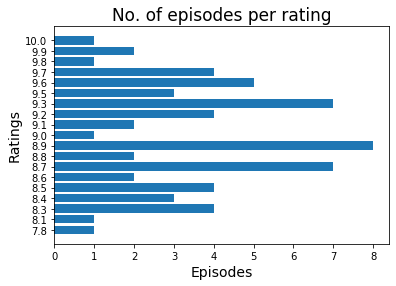

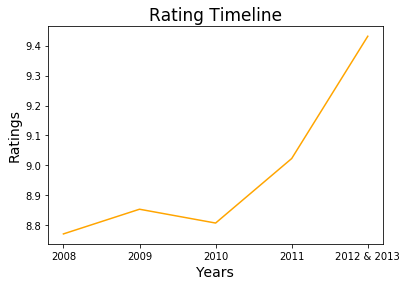

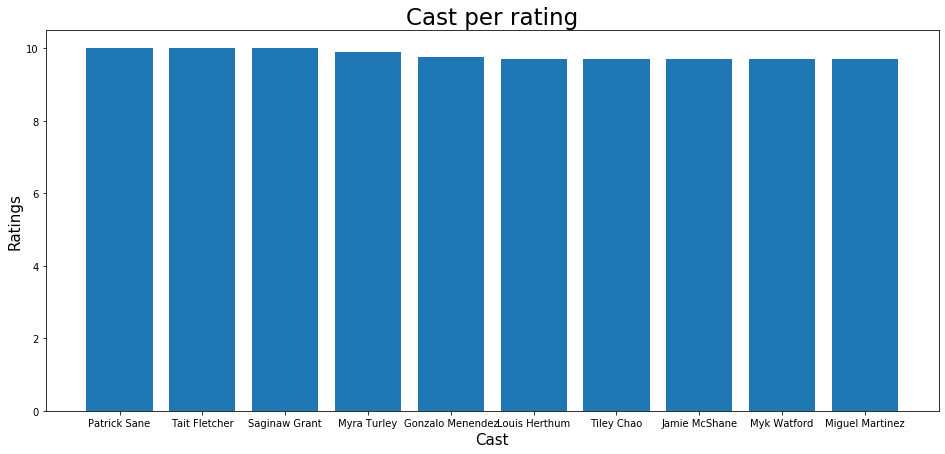

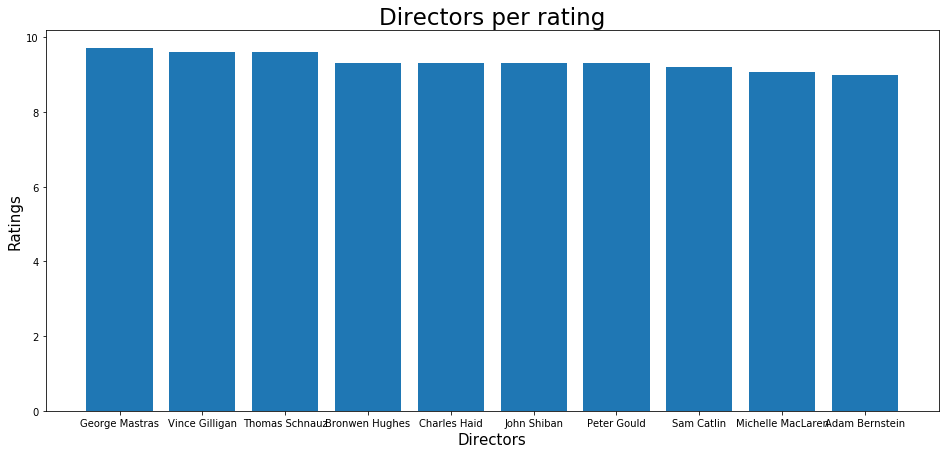

In [4]:
bb_series = pd.DataFrame(data, columns = ['Title', 'Director', 'Rating', 'Airdate', 'Season_number', 'Episode_Number', 'Description', 'Genres', 'Cast', 'Character'])
# bb_series
bb_series.to_csv(r'BB.csv')


# ************************* No. of Episodes per rating bar graph ***************************************

myRating1 =[]
myRating1 = [float(x) for x in bb_series['Rating']]



myRating22 = []
for a in myRating1:
    if a>=7:
        myRating22.append(a)

my_dict_Count1 = {i:myRating22.count(i) for i in myRating22}

# for i in range(0,10):
#     if i+1 not in my_dict_Count1:
#         my_dict_Count1[i+1] = 0

mySorted1 = {}

for key in sorted(my_dict_Count1.keys()):
    mySorted1[key] = my_dict_Count1[key]

plt.barh(range(len(mySorted1)), mySorted1.values(), align='center')
plt.yticks(range(len(mySorted1)), mySorted1.keys())
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('No. of episodes per rating', fontsize=17)

plt.show()

# ************************* Rating TimeLine ***************************************

years1 = ['2008', '2009', '2010', '2011', '2012 & 2013']
# for index in range(0, len(bb_series)):
#     if bb_series['Airdate'][index].split()[4] not in years1:
#         years1.append(bb_series['Airdate'][index].split()[4])
# print(years1)

seasonNumber1 = ""
ratingCount1 = 0
totalCount1 = 0
average1=[]

i = 0
while i<len(bb_series['Season_number']):
    seasonNumber1 = bb_series['Season_number'][i]
    ratingCount1 = 0
    totalCount1 = 0
    
    for index in range(0, len(bb_series)):
        if(seasonNumber1 == bb_series['Season_number'][index]):
            ratingCount1+=float(bb_series['Rating'][index])
            totalCount1+=1
            i+=1

#     seasonNumberWord.append(seasonNumber)
    average1.append(ratingCount1/totalCount1)

plt.plot(years1, average1, color='orange')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('Rating Timeline', fontsize=17)
plt.show()




# ************************* Cast average Rating ***************************************
castArray = []

for j in range(0, len(bb_series)):
    for i in range(0, len(bb_series['Cast'][j])):
        if bb_series['Cast'][j][i] not in castArray:
            castArray.append(bb_series['Cast'][j][i])

castRating = 0
totalCastRating = 0
castRatingArray = []
topCastRating = {}
topCastRating1 = {}

for k in range(0, len(castArray)):
    
    castRating = 0
    totalCastRating = 0
    
    for l in range(0, len(bb_series)):
        if castArray[k] in bb_series['Cast'][l]:
            castRating+=float(bb_series['Rating'][l])
            totalCastRating+=1
    topCastRating[castArray[k]] = castRating/totalCastRating
    castRatingArray.append(castRating/totalCastRating)


for r in sorted(topCastRating, key=topCastRating.get, reverse=True)[:10]:
    topCastRating1[r] = topCastRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topCastRating1.items()))
plt.xlabel('Cast', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Cast per rating', fontsize=23)
plt.show()


# ************************* Director average Rating ***************************************
directorArray = []

for j in range(0, len(bb_series)):
#     print('Anna Fleix' in bb_series['Director'][j])
#     for i in range(0, len(bb_series['Director'][j])):
    if bb_series['Director'][j] not in directorArray:
        directorArray.append(bb_series['Director'][j])

directorRating = 0
totalDirectorRating = 0
directorRatingArray = []
topDirectorRating = {}
topDirectorRating1 = {}

for k in range(0, len(directorArray)):
    
    directorRating = 0
    totalDirectorRating = 0
    
    for l in range(0, len(bb_series)):
        if directorArray[k] in bb_series['Director'][l]:
            directorRating+=float(bb_series['Rating'][l])
            totalDirectorRating+=1
    topDirectorRating[directorArray[k]] = directorRating/totalDirectorRating
    directorRatingArray.append(directorRating/totalDirectorRating)


for r in sorted(topDirectorRating, key=topDirectorRating.get, reverse=True)[:10]:
    topDirectorRating1[r] = topDirectorRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topDirectorRating1.items()))
plt.xlabel('Directors', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Directors per rating', fontsize=23)
plt.show()





In [11]:
#text preprocessing
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
preprocessed = []
for paragraph in bb_series['Description']:
    paragraph = paragraph.lower()   
    translator = str.maketrans('', '', string.punctuation) 
    paragraph = paragraph.translate(translator) 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(paragraph) 
    text = [word for word in word_tokens if word not in stop_words]
    preprocessed.append(text)

[nltk_data] Downloading package stopwords to /home/manas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/manas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
bb_series['tokens']=preprocessed
bb_series.head

<bound method NDFrame.head of                             Title           Director Rating  \
0                           Pilot     Vince Gilligan    9.0   
1             Cat's in the Bag...     Adam Bernstein    8.7   
2   ...And the Bag's in the River     Adam Bernstein    8.8   
3                      Cancer Man          Jim McKay    8.3   
4                     Gray Matter       Tricia Brock    8.4   
..                            ...                ...    ...   
57                      Rabid Dog         Sam Catlin    9.2   
58                    To'hajiilee  Michelle MacLaren    9.8   
59                     Ozymandias       Rian Johnson     10   
60                  Granite State        Peter Gould    9.7   
61                         Felina     Vince Gilligan    9.9   

                            Airdate Season_number Episode_Number  \
0     Episode aired 20 January 2008      Season 1      Episode 1   
1     Episode aired 27 January 2008      Season 1      Episode 2   
2    Epis

In [5]:
from wordcloud import WordCloud
def create_word_cloud(tokens):
    word_cloud_collection=''
    for i in tokens:
        for words in i:
            word_cloud_collection = word_cloud_collection + words + ' '

    wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

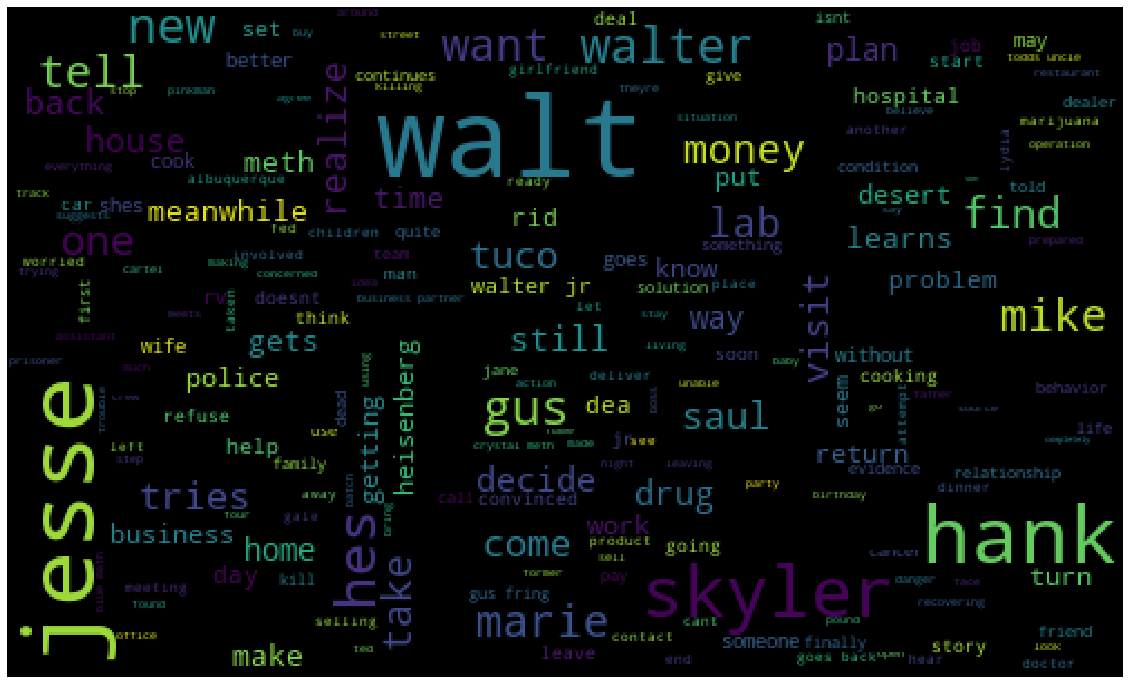

In [13]:
create_word_cloud(bb_series['tokens'])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim 
from gensim.models import Word2Vec
f=[]
for i in bb_series['tokens']:
    s = " ".join(i)
    f.append(s)
# list of text documents
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(f)
# summarize
vects = vectorizer.transform(f)

print(vectorizer.vocabulary_)

{'days': 326, '50th': 7, 'birthday': 144, 'chemistry': 228, 'teacher': 1331, 'walter': 1451, 'whites': 1475, 'life': 766, 'quiet': 1049, 'desperation': 356, 'completely': 260, 'transforms': 1384, 'hes': 605, 'diagnosed': 363, 'inoperable': 659, 'lung': 794, 'cancer': 198, 'support': 1309, 'pregnant': 989, 'wife': 1478, 'son': 1248, 'partners': 942, 'jesse': 694, 'former': 515, 'student': 1296, 'turn': 1401, 'old': 906, 'rv': 1150, 'mobile': 853, 'meth': 835, 'lab': 731, 'first': 500, 'attempt': 94, 'unloading': 1423, 'product': 1008, 'takes': 1322, 'deadly': 330, 'introduces': 676, 'walt': 1450, 'unstable': 1425, 'business': 188, 'associates': 88, 'manage': 806, 'get': 545, 'pulled': 1031, 'ditch': 382, 'face': 466, 'another': 64, 'problem': 1002, 'realize': 1063, 'krazy8': 730, 'one': 908, 'attackers': 93, 'still': 1281, 'breathing': 173, 'grim': 565, 'choices': 233, 'losing': 789, 'coin': 248, 'toss': 1373, 'rid': 1137, 'dead': 329, 'emilios': 422, 'body': 158, 'walts': 1453, 'skyler